<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup-for-experiments" data-toc-modified-id="Setup-for-experiments-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup for experiments</a></span></li><li><span><a href="#Train-and-run-policy-for-Taxi-V3" data-toc-modified-id="Train-and-run-policy-for-Taxi-V3-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Train and run policy for Taxi V3</a></span></li><li><span><a href="#Train-and-run-policy-for-FrozenLake" data-toc-modified-id="Train-and-run-policy-for-FrozenLake-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Train and run policy for FrozenLake</a></span></li><li><span><a href="#Q-learning-with-Q-Table-for-stochastic-environments" data-toc-modified-id="Q-learning-with-Q-Table-for-stochastic-environments-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Q-learning with Q-Table for stochastic environments</a></span></li><li><span><a href="#Further-Work" data-toc-modified-id="Further-Work-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Further Work</a></span></li></ul></div>

In [3]:
import sys
import os

%reload_ext autoreload
%autoreload 2

EZAI_RL_ROOT=os.path.join(os.path.expanduser('~'),'projects','ezai_rl')
if not EZAI_RL_ROOT in sys.path:
    sys.path.append(EZAI_RL_ROOT)
import ezai_rl
print(ezai_rl.__version__)

0.1.0-dev


In [4]:
import gym
print('OpenAI Gym:',gym.__version__)
import numpy as np
print('NumPy:',np.__version__)
import matplotlib.pyplot as plt

OpenAI Gym: 0.17.2
NumPy: 1.19.1


## Setup for experiments

In [28]:
from ezai_rl.policies import QTablePolicy
from ezai_rl.policies import RandomPolicy
from ezai_rl.trial import experiment

In [29]:
# remove the seeds to get random plays everytime
np.random.seed(123)
policy_qt = QTablePolicy(nS=2,nA=2)

for i in range(10):
    print(policy_qt.decay_er(i))

0.9
0.8955611064814872
0.8911443520367597
0.8867496262467258
0.8823768192430121
0.878025821705216
0.8736965248581723
0.8693888204692342
0.8651026008455677
0.860837758831459


## Train and run policy for Taxi V3

training policies
100%|██████████| 1000/1000 [00:02<00:00, 452.70it/s]
Policy:Q_Table, E's=1000, G= Mean:-71.22,Min:-803.00,Max:15.00


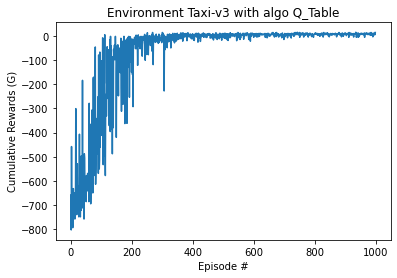

using trained policies
100%|██████████| 10/10 [00:00<00:00, 160.22it/s]
Policy:Random, E's=10, G= Mean:-731.50,Min:-866.00,Max:-269.00


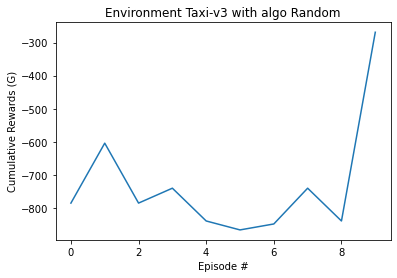

100%|██████████| 10/10 [00:00<00:00, 1185.90it/s]
Policy:Q_Table, E's=10, G= Mean:7.70,Min:3.00,Max:14.00


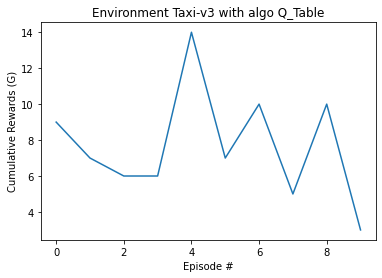

In [27]:
env=gym.make('Taxi-v3')

# remove the seeds to get random plays everytime
np.random.seed(123)
env.seed(123)

policy_rand = RandomPolicy(env.action_space.n)
policy_qt = QTablePolicy(nS = env.observation_space.n,
                         nA = env.action_space.n)

print('training policies')
n_episodes = 1000
returns=run_episodes(env,policy_qt, n_episodes, learn_mode=True)

print('using trained policies')
n_episodes=10
returns=run_episodes(env,policy_rand,n_episodes)
returns=run_episodes(env,policy_qt,n_episodes)

env.close()

## Train and run policy for FrozenLake

training policies
 30%|███       | 300/1000 [00:00<00:00, 2994.26it/s]

/opt/anaconda3/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


100%|██████████| 1000/1000 [00:00<00:00, 1637.03it/s]
Policy:Q_Table, E's=1000, G= Mean:0.18,Min:0.00,Max:1.00


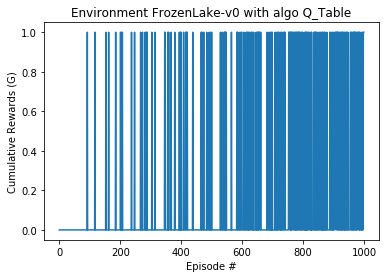

using trained policies
100%|██████████| 10/10 [00:00<00:00, 2487.87it/s]
Policy:random, E's=10, G= Mean:0.00,Min:0.00,Max:0.00


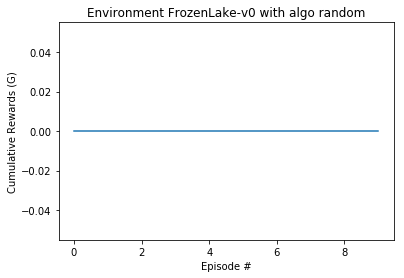

100%|██████████| 10/10 [00:00<00:00, 519.57it/s]
Policy:Q_Table, E's=10, G= Mean:0.50,Min:0.00,Max:1.00


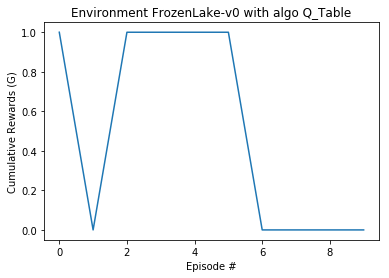

In [9]:
env=gym.make('FrozenLake-v0')

# remove the seeds to get random plays everytime
np.random.seed(123)
env.seed(123)

policy_rand = policy_random(env.action_space.n)
policy_qt = policy_q_table(env.observation_space.n,env.action_space.n)

print('training policies')
n_episodes = 1000
returns=experiment(env,policy_qt, n_episodes, learn_mode=True)

print('using trained policies')
n_episodes = 10
returns=experiment(env,policy_rand, n_episodes)
returns=experiment(env,policy_qt, n_episodes)

env.close()

## Q-learning with Q-Table for stochastic environments

In [10]:
class policy_q_table_s(policy_q):
    def __init__(self,
                 nS,
                 nA,
                 discount_rate=0.9,
                 learning_rate=0.8,
                 explore_rate_max=0.9,
                 explore_rate_min=0.01,
                 explore_rate_decay=0.005):
        super().__init__(nS, nA, discount_rate, learning_rate,
                         explore_rate_max, explore_rate_min,
                         explore_rate_decay)

        self.__name__ = 'Q_Table+SP'

        # create a q-table of shape (S X A)
        # representing S X A -> R
        self.nQ = np.append(self.nS, self.nA)
        self.q_table = np.zeros(shape=self.nQ)
        self.nP = np.append(self.nQ, self.nS)
        self.p_table = np.zeros(shape = self.nP)
        self.r_table = np.zeros(shape = self.nP)
        #self.v_s_ = np.zeros(shape=(self.nS))
    def get_action(self, s):
        # Exploration - Select a random action
        if self.learn_mode and np.random.random() < self.er:
            a = np.random.choice(self.nA)
            if self.debug:
                print('Selecting random action ', a)
        # Exploitation - Select the action with the highest q
        else:
            a = self.q_table[s].argmax()
            if self.debug:
                print('Selecting best action ', a)
        return a

    def update(self, s,a,r,s_,done):        
        i = tuple(np.append(s, a))
        j = tuple(np.append(i, s_))
        self.p_table[j]+=1
        self.r_table[j]=r


        ss_ = self.p_table[i]
        pss_ = ss_/ss_.sum()
        rss_ = self.r_table[i]
        v_s_ = self.q_table.max(axis=1)
        #print('ss_\n',ss_,'pss_\n',pss_,'rss_\n',rss_,'v_s_',v_s_)
        
        e_q_sa = ((rss_ + self.dr * v_s_) * pss_).sum()
        
        self.q_table[i] += self.lr * (e_q_sa - self.q_table[i])
        if self.debug:
            print('Updated Q Table')
            print(self.q_table)

training policies
100%|██████████| 900/900 [00:00<00:00, 1864.32it/s]
Policy:Q_Table, E's=900, G= Mean:0.16,Min:0.00,Max:1.00


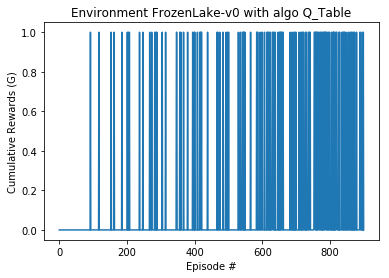

100%|██████████| 900/900 [00:01<00:00, 504.16it/s] 
Policy:Q_Table+SP, E's=900, G= Mean:0.28,Min:0.00,Max:1.00


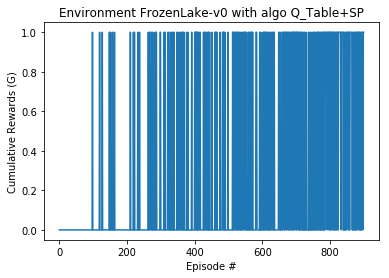

using trained policies
100%|██████████| 10/10 [00:00<00:00, 6693.75it/s]
Policy:random, E's=10, G= Mean:0.10,Min:0.00,Max:1.00


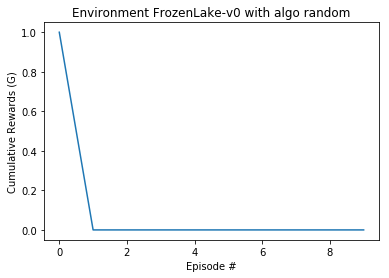

100%|██████████| 10/10 [00:00<00:00, 471.57it/s]
Policy:Q_Table, E's=10, G= Mean:0.70,Min:0.00,Max:1.00


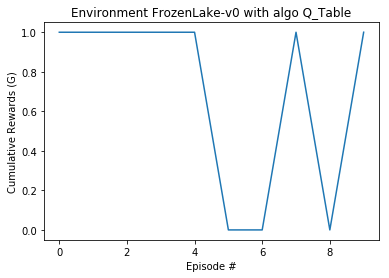

100%|██████████| 10/10 [00:00<00:00, 404.54it/s]
Policy:Q_Table+SP, E's=10, G= Mean:0.70,Min:0.00,Max:1.00


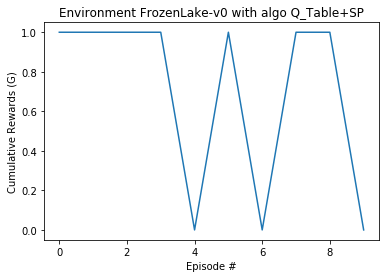

In [11]:
env=gym.make('FrozenLake-v0')

# remove the seeds to get random plays everytime
np.random.seed(123)
env.seed(123)

policy_rand = policy_random(env.action_space.n)
policy_qt = policy_q_table(env.observation_space.n,env.action_space.n)
policy_qt_s = policy_q_table_s(env.observation_space.n,env.action_space.n)

print('training policies')
n_episodes = 900
_=experiment(env,policy_qt, n_episodes, learn_mode=True)
_=experiment(env,policy_qt_s, n_episodes, learn_mode=True)

print('using trained policies')
n_episodes = 10
_=experiment(env,policy_rand,n_episodes)
_=experiment(env,policy_qt,n_episodes)
_=experiment(env,policy_qt_s,n_episodes)

env.close()

## Further Work

In [12]:
# Run the code on discretized version of pong or CartPole